# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
Pymaceutical Data Analysis


From Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.84
Linear Regression Model: y = 0.95x + 21.55, where x is the weight of the mice showed that as the weight of the mice increases the tumor size also increases.   0.84 gives a strong correlation of the data.
Also, there is a positive correlation between the size in weight of a mouse and the size of the tumor volume depicted on the scatter plot. 
There was close to an equal divide between male and female test subjects which was shown by the pie chart distribution.
Propriva was the least frequently used drug in the study as shown on the bar chart with Capomulin as the highest followed closely with Ramicane. 
Looking at the data distribution from the Boxplot, Ceftamin is evenly distributed, Infubinol is tilted to the lower side, Ramicane is evenly distributed and Capomulin is tilted to the upper side of the data distribution.
Infubinol was the only drug analyzed that had an outlier.
Capomulin had a smaller variance in final tumor volume than the other three drugs analyzed shown in the table.
Ceftamin had a larger variance in final tumor volume than the other three drugs analyzed as shown in the table.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# local path here data files
file_path='C:/Users/18607/uu/homework/Pymaceuticals Challenge 5/'

mouse_metadata_path =file_path+ "data/Mouse_metadata.csv"
study_results_path =file_path+ "data/Study_results.csv"



# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_result=mouse_metadata.merge(study_results, how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
mouse_study_result.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:

# Get the number of unique mice
num_mice = mouse_study_result['Mouse ID'].nunique()
print(f'The number of mice in the dataset is: {num_mice}')

The number of mice in the dataset is: 249


In [5]:
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = mouse_study_result[mouse_study_result.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the IDs of the duplicate mice
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

print(f"The following mice have duplicate entries based on Mouse ID and Timepoint: {duplicate_mice_ids}")


The following mice have duplicate entries based on Mouse ID and Timepoint: ['g989']


In [6]:
# Optional: Get all the data for the duplicate Mouse IDs
duplicate_mice_data = mouse_study_result[mouse_study_result['Mouse ID'].isin(duplicate_mice_ids)]

duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_mouse_study_result = mouse_study_result.drop_duplicates(subset=['Mouse ID'], keep='first')

# Verify the new DataFrame
cleaned_mouse_study_result 
#= cleaned_mouse_study_result['Mouse ID'].nunique()
 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.

cleaned_mouse_study_result['Mouse ID'].nunique()

249

## Summary Statistics

In [9]:
# Grouping by 'Drug Regimen' and calculating the required statistics
summary_stats = mouse_study_result.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume = 'mean',
    Median_Tumor_Volume = 'median',
    Tumor_Volume_Variance = 'var',
    Tumor_Volume_Std_Dev = 'std',
    Tumor_Volume_Std_Err = 'sem'
)

 


#print("Summary Statistics of Tumor Volume for each Drug Regimen:")
summary_stats


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [11]:


summary_stats = mouse_study_result.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Var='var',
    Std='std',
    Sem='sem'
).reset_index()

 
 



 
# Flatten the column names
#summary_stats.columns = ['Tumor Volume (mm3)', 'Mean', 'Median', 'Variance', 'Std Dev', 'Std Err']

#print("Summary Statistics grouped by Tumor Volume (mm3):")
#print(summary_stats)


# Flatten the column names
#summary_stats.columns = ['Tumor Volume (mm3)', 'Mean', 'Median', 'Variance', 'Std Dev', 'Std Err']

#print("Summary Statistics grouped by Tumor Volume (mm3):")
summary_stats


#print("Summary Statistics grouped by Tumor Volume (mm3):")
#print(summary_stats)


#print("Summary Statistics of Tumor Volume for each Drug Regimen:")
#print(summary_stats)
   

 
summary_stats



,Drug Regimen,Mean,Median,Var,Std,Sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

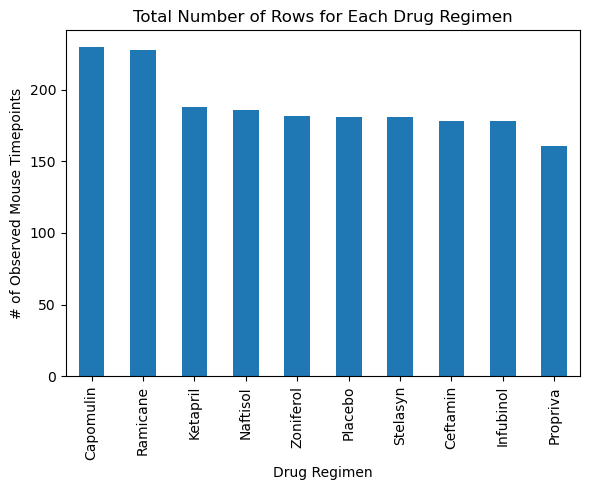

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

 
counts_per_regimen = mouse_study_result.groupby('Drug Regimen').size().sort_values(ascending=False)

 
counts_per_regimen.plot(kind='bar', figsize=(6, 5))

 
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)   

plt.tight_layout()
plt.show()


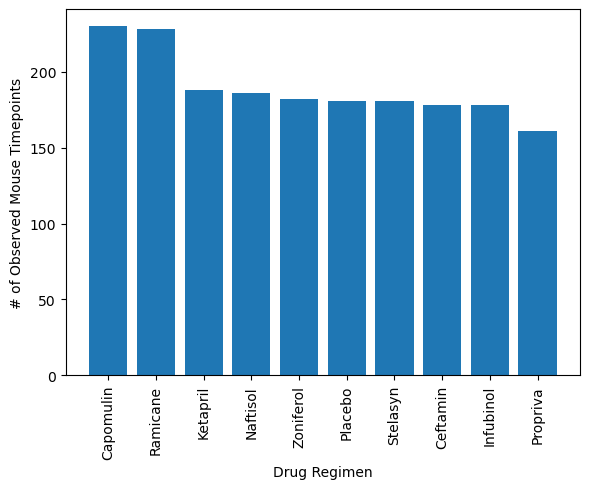

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

 
counts_per_regimen = mouse_study_result.groupby('Drug Regimen').size().sort_values(ascending=False)

plt.figure(figsize=(6, 5))
plt.bar(counts_per_regimen.index, counts_per_regimen)

# Adding labels and title
plt.title('')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)   

plt.tight_layout()
plt.show()



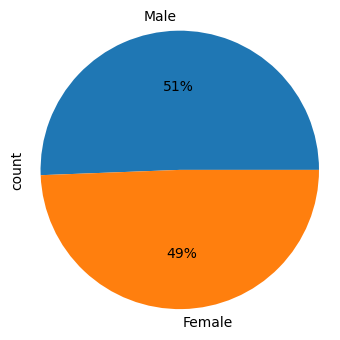

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt

gender_distribution = mouse_study_result['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.0f%%', figsize=(3.5,3.5))

# Adding title
plt.title('')

plt.axis('equal')   

plt.tight_layout()
plt.show()


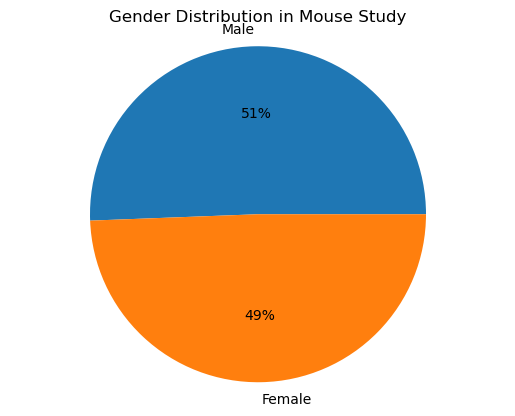

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
import matplotlib.pyplot as plt

gender_distribution = mouse_study_result['Sex'].value_counts()

#plot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.0f%%')

#Add title
plt.title('Gender Distribution in Mouse Study')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
gender_distribution = mouse_study_result['Sex'].value_counts()

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
 
last_timepoints = mouse_study_result.groupby('Mouse ID')['Timepoint'].max().reset_index()

 
merged_data = pd.merge(last_timepoints, mouse_study_result, on=['Mouse ID', 'Timepoint'], how='left')

 
specific_regimens = merged_data[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

 
specific_regimens[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]





,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


In [98]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# List of treatments for looping and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor volume data
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter data for the specific treatment
    treatment_data = mouse_study_result[mouse_study_result['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
     
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and identify potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"----- {treatment} -----")
    print(f"IQR for {treatment}: {iqr}")
    print(f"Potential outliers for {treatment}: {outliers}\n")


----- Capomulin -----
IQR for Capomulin: 7.314067135000002
Potential outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

----- Ramicane -----
IQR for Ramicane: 8.325365415
Potential outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

----- Infubinol -----
IQR for Infubinol: 10.002090667500006
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Ceftamin -----
IQR for Ceftamin: 9.593010457500007
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)



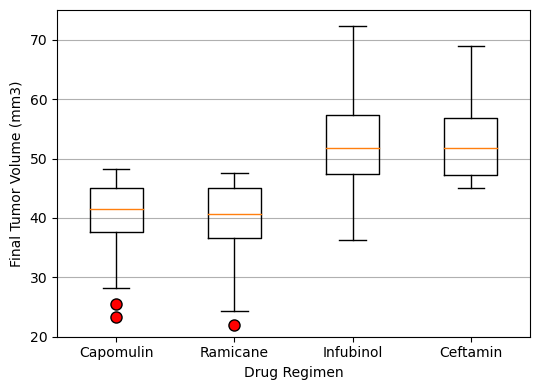

In [109]:
import matplotlib.pyplot as plt

# Generate box plot
plt.figure(figsize=(5.5, 4))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(20, 75)   
plt.grid(axis='y')   

plt.tight_layout()
plt.show()


## Line and Scatter Plots

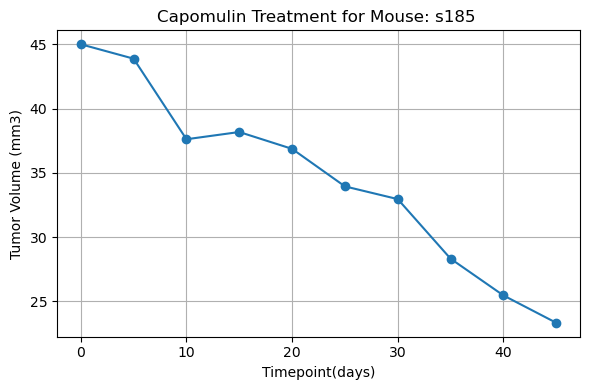

In [121]:
import matplotlib.pyplot as plt

# Choose a specific mouse ID treated with Capomulin
selected_mouse = 's185'

 
capomulin_data = mouse_study_result[(mouse_study_result['Drug Regimen'] == 'Capomulin') &(mouse_study_result['Mouse ID'] == selected_mouse)]

 
plt.figure(figsize=(6, 4))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')

# Adding labels and title
plt.title(f"Capomulin Treatment for Mouse: {selected_mouse} ")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

plt.tight_layout()
plt.show()


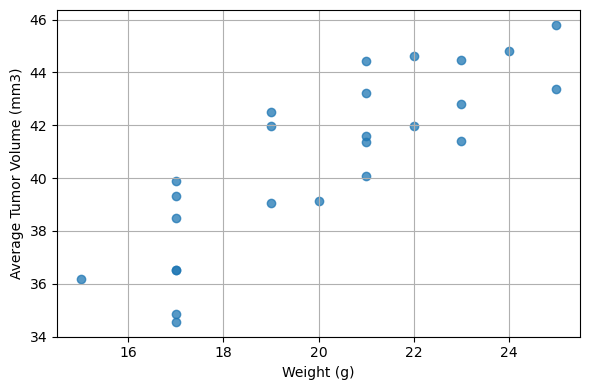

In [125]:
import matplotlib.pyplot as plt

# Filter data for the Capomulin regimen
capomulin_data = mouse_study_result[mouse_study_result['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get corresponding weight for each mouse
mouse_weight = capomulin_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Weight (g)']]

# Merge average tumor volume and weight data
avg_tumor_weight = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID', how='left')

# Create scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(6, 4))
plt.scatter(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'],  alpha=0.75)

# Adding labels and title
 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.84
Linear Regression Model: y = 0.95x + 21.55


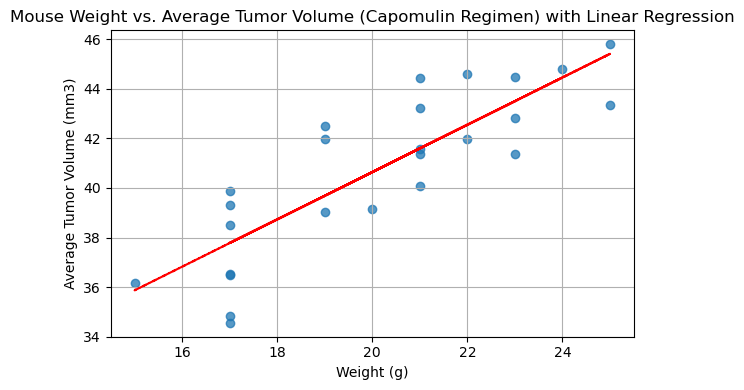

In [128]:
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = avg_tumor_weight['Weight (g)'].corr(avg_tumor_weight['Tumor Volume (mm3)'])

 
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'])

 
print(f"Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation:.2f}")

# Display linear regression model
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

# Plot the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'],  alpha=0.75)

# Plot the regression line
plt.plot(avg_tumor_weight['Weight (g)'], slope * avg_tumor_weight['Weight (g)'] + intercept, color='red', linestyle='--')

# Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen) with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

plt.tight_layout()
plt.show()
